<a href="https://colab.research.google.com/github/Leoli04/llms-notebooks/blob/main/d2l/03_d2l_multilayer_perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 多层感知机

 最简单的深度网络称为多层感知机。多层感知机由多层神经元组成， 每一层与它的上一层相连，从中接收输入； 同时每一层也与它的下一层相连，影响当前层的神经元。





## 多层感知机

多层感知机由以下几个部分组成：

1.  **输入层（Input Layer）：**

  - 接受来自外部的数据输入。输入层的每个节点（神经元）代表一个输入特征。

2.  **隐藏层（Hidden Layer）：**

  - 位于输入层和输出层之间，负责对输入数据进行非线性变换。隐藏层可以有一个或多个，每层包含若干神经元。每个隐藏层神经元接收前一层所有神经元的输出，并通过激活函数（Activation Function）进行处理。
3.  输出层（Output Layer）：

### 隐藏层

上一节主要聊的是线性神经网络， 例如，如果我们试图预测一个人是否会偿还贷款。 我们可以认为，在其他条件不变的情况下， 收入较高的申请人比收入较低的申请人更有可能偿还贷款。 但是，虽然收入与还款概率存在单调性，但它们不是线性相关的。 收入从0增加到5万，可能比从100万增加到105万带来更大的还款可能性。 处理这一问题的一种方法是对我们的数据进行预处理， 使线性变得更合理，如使用收入的对数作为我们的特征。

然而我们可以很容易找出违反单调性的例子。 例如，我们想要根据体温预测死亡率。 对体温高于37摄氏度的人来说，温度越高风险越大。 然而，对体温低于37摄氏度的人来说，温度越高风险就越低。 在这种情况下，我们也可以通过一些巧妙的预处理来解决问题。 例如，我们可以使用与37摄氏度的距离作为特征。

我们可以通过在网络中加入一个或多个隐藏层来克服线性模型的限制， 使其能处理更普遍的函数关系类型。


**通过多个隐藏层的逐层处理，模型能够从原始输入中提取和抽象出多层次的特征，从而具备强大的表达能力和泛化能力。隐藏层数量和每层神经元数量的选择是设计MLP时的重要考虑因素，会直接影响模型的性能和计算复杂度。**

### 激活函数

激活函数（activation function）通过计算加权和并加上偏置来确定神经元是否应该被激活， 它们将输入信号转换为输出的可微运算。 大多数激活函数都是非线性的。

In [ ]:
!pip install d2l

In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

#### ReLU函数

修正线性单元（Rectified linear unit，ReLU）， 实现简单，同时在各种预测任务中表现良好。

$$\operatorname{ReLU}(x) = \max(x, 0).$$

即将输入中的负值部分设为0，正值部分保持不变。

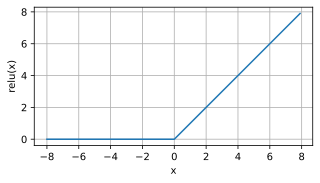

In [ ]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

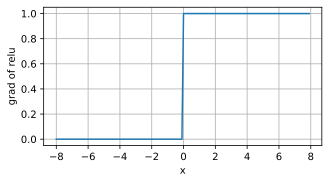

In [ ]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

#### sigmoid函数

[**对于一个定义域在$\mathbb{R}$中的输入，
*sigmoid函数*将输入变换为区间(0, 1)上的输出**]。
因此，sigmoid通常称为*挤压函数*（squashing function）：
它将范围（-inf, inf）中的任意输入压缩到区间（0, 1）中的某个值：

**$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}$$**

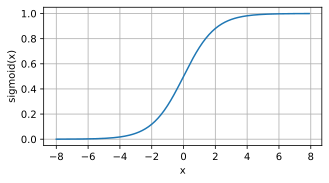

In [ ]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

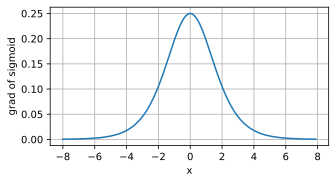

In [ ]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

#### tanh函数

与sigmoid函数类似，
[**tanh(双曲正切)函数也能将其输入压缩转换到区间(-1, 1)上**]。
tanh函数的公式如下：

**$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$**

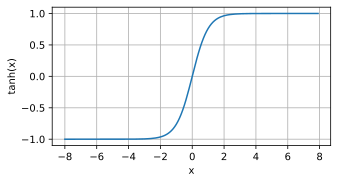

In [ ]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

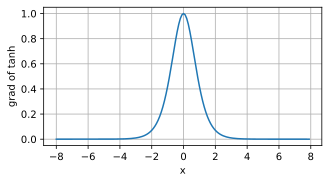

In [ ]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

## 多层感知机的实现

介绍通过高级API更简洁地实现多层感知机。

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

# 模型
net = nn.Sequential(nn.Flatten(),
          nn.Linear(784, 256),
          nn.ReLU(),
          nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 小结

  - 输出最终的预测结果。输出层的神经元数量与任务的输出需求一致，例如分类任务中，输出层的神经元数量等于类别数。


- 多层感知机在输出层和输入层之间增加一个或多个全连接隐藏层，并通过激活函数转换隐藏层的输出。

- 常用的激活函数包括ReLU函数、sigmoid函数和tanh函数。

- 超参数为隐藏层数，和各个隐藏层大小

## 模型选择、欠拟合和过拟合

机器学习的目标是发现某些模式， 这些模式捕捉到了我们训练集潜在总体的规律。 如果成功做到了这点，即使是对以前从未遇到过的个体， 模型也可以成功地评估风险。 如何发现可以泛化的模式是机器学习的根本问题。

将模型在训练数据上拟合的比在潜在分布中更接近的现象称为过拟合（overfitting）， 用于对抗过拟合的技术称为正则化（regularization）。


### 训练误差和泛化误差

- 训练误差（training error）是指， 模型在训练数据集上计算得到的误差。
泛化误差（generalization error）是指， 模型在新数据上的误差

#### 模型复杂性

当我们有简单的模型和大量的数据时，我们期望泛化误差与训练误差相近。 当我们有更复杂的模型和更少的样本时，我们预计训练误差会下降，但泛化误差会增大。


我们将重点介绍几个倾向于影响模型泛化的因素。

1. **可调整参数的数量。**当可调整参数的数量（有时称为*自由度*）很大时，模型往往更容易过拟合。
1. **参数采用的值。**当权重的取值范围较大时，模型可能更容易过拟合。
1. **训练样本的数量**。即使模型很简单，也很容易过拟合只包含一两个样本的数据集。而过拟合一个有数百万个样本的数据集则需要一个极其灵活的模型。

### 模型选择

在机器学习中，我们通常在评估几个候选模型后选择最终的模型。 这个过程叫做模型选择。

#### 验证集

- 验证数据集（validation dataset）:一个用来评估模型好坏的数据集
- 测试数据集:只用一次的数据集。

####  $K$折交叉验证

当训练数据稀缺时，我们甚至可能无法提供足够的数据来构成一个合适的验证集。
这个问题的一个流行的解决方案是采用$K$*折交叉验证*。


将原始训练数据被分成$K$个不重叠的子集。
然后执行$K$次模型训练和验证，每次在$K-1$个子集上进行训练，
并在剩余的一个子集（在该轮中没有用于训练的子集）上进行验证。
最后，通过对$K$次实验的结果取平均来估计训练和验证误差。

### 欠拟合还是过拟合？

 - 如果模型不能降低训练误差，这可能意味着模型过于简单（即表达能力不足）， 无法捕获试图学习的模式。  这种现象被称为欠拟合（underfitting）。

 - 当我们的训练误差明显低于验证误差时要小心， 这表明严重的过拟合（overfitting）。

 训练数据集中的样本越少，我们就越有可能（且更严重地）过拟合。 随着训练数据量的增加，泛化误差通常会减小。

### 多项式回归

通过多项式拟合来探索这些概念。

In [ ]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

# 生成数据集

max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100  # 训练和测试数据集大小
true_w = np.zeros(max_degree)  # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # gamma(n)=(n-1)!
# labels的维度:(n_train+n_test,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

# NumPy ndarray转换为tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]

# 对模型进行训练和测试

def evaluate_loss(net, data_iter, loss):
    """评估给定数据集上模型的损失"""
    metric = d2l.Accumulator(2)  # 损失的总和,样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())


In [ ]:
# 正常拟合
# 从多项式特征中选择前4个维度，即1,x,x^2/2!,x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

In [ ]:
# 欠拟合

# 从多项式特征中选择前2个维度，即1和x
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

# 过拟合
# 从多项式特征中选取所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

### 小结

- 训练数据集:训练模型参数
- 验证数据集:选择模型超参数
- 非大数据集上通常使用 k-折交叉验证

- 模型容量需要匹配数据复杂度，否则可能导致欠拟合和过
拟合

- 欠拟合是指模型无法继续减少训练误差。过拟合是指训练误差远小于验证误差。机器学习模型需要注意防止过拟合，即防止泛化误差过大。

## 权重衰减

权重衰减（Weight Decay），也称为L2正则化，是一种用于防止机器学习模型过拟合的技术。其原理是在损失函数中添加一个关于模型权重的惩罚项，从而限制模型参数的过大变化，使得模型更加简单、泛化能力更强。

原理：
假设我们有一个损失函数$L(\mathbf{w}, b)$，其中 $\mathbf{w}$ 是模型的权重向量。在权重衰减中，我们修改损失函数，添加一个权重的二范数（L2范数）作为惩罚项。新的损失函数形式如下：

$$L(\mathbf{w}, b) + \frac{\lambda}{2} \|\mathbf{w}\|^2$$

其中：

$\lambda$ 是正则化系数，控制权重衰减的强度。

$\|\mathbf{w}\|^2$:表示权重向量的二范数的平方，即所有权重的平方和。

### 小结

- 权重衰退通过L2 正则项使得模型参数不会过大，从而控制模型复杂度
- 正则项权重是控制模型复杂度的超参数
- 正则化是处理过拟合的常用方法：在训练集的损失函数中加入惩罚项，以降低学习到的模型的复杂度。

- 保持模型简单的一个特别的选择是使用
惩罚的权重衰减。这会导致学习算法更新步骤中的权重衰减。

In [ ]:
# 在PyTorch中，权重衰减可以通过在优化器中设置 weight_decay 参数来实现。
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

## 暂退法（Dropout）（丢弃法）

暂退法（Dropout）也叫丢弃法，是一种防止神经网络过拟合的技术。通过在训练过程中随机地忽略（即“暂退”）一部分神经元，可以使网络更加鲁棒，减少过拟合，提高泛化能力。

暂退法的实现步骤
- 在每个训练步骤中，随机选择一些神经元，将它们的输出设置为零。
- 其他神经元继续正常工作，参与前向传播和反向传播。
- 在每个训练步骤中，选择的神经元都是随机的。
- 在测试过程中，不使用暂退法，而是使用所有的神经元，并将它们的输出缩放（通常按暂退概率进行缩放），以近似地模拟训练过程中每个神经元的期望输出。

### 动手实现

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

# 暂退法函数
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # 在本情况中，所有元素都被丢弃
    if dropout == 1:
        return torch.zeros_like(X)
    # 在本情况中，所有元素都被保留
    if dropout == 0:
        return X
    # 比较随机张量与 Dropout 概率 p，生成一个布尔掩码，其中元素为 True（值为1）表示保留该神经元，
    # 为 False（值为0）表示忽略该神经元。
    mask = (torch.rand(X.shape) > dropout).float()
    # mask * X 将输入张量 X 与掩码相乘，忽略部分神经元的输出。
    # 1/ (1.0 - dropout)对剩下的神经元输出进行缩放，以保持输出的期望值不变。
    return mask * X / (1.0 - dropout)

# 模型参数
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

dropout1, dropout2 = 0.2, 0.5

# 模型
class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                 is_training = True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # 只有在训练模型时才使用dropout
        if self.training == True:
            # 在第一个全连接层之后添加一个dropout层
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            # 在第二个全连接层之后添加一个dropout层
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out


net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

# 训练与测试
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 框架实现

对于深度学习框架的高级API，我们只需在每个全连接层之后添加一个Dropout层， 将暂退概率作为唯一的参数传递给它的构造函数。 在训练时，Dropout层将根据指定的暂退概率随机丢弃上一层的输出（相当于下一层的输入）。 在测试时，Dropout层仅传递数据。

In [ ]:
net = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # 在第一个全连接层之后添加一个dropout层
        nn.Dropout(dropout1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # 在第二个全连接层之后添加一个dropout层
        nn.Dropout(dropout2),
        nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

In [ ]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 小结

- 丢弃法将一些输出项随机置0来控制模型复杂度
- 常作用在多层感知机的隐藏层输出上
- 丢弃概率是控制模型复杂度的超参数
- 暂退法仅在训练期间使用。

## 前向传播、反向传播和计算图

- 前向传播在神经网络定义的计算图中按顺序计算和存储中间变量，它的顺序是从输入层到输出层。
- 反向传播按相反的顺序（从输出层到输入层）计算和存储神经网络的中间变量和参数的梯度。
- 在训练深度学习模型时，前向传播和反向传播是相互依赖的。。 对于前向传播，我们沿着依赖的方向遍历计算图并计算其路径上的所有变量。 然后将这些用于反向传播，其中计算顺序与计算图的相反。
- 训练比预测需要更多的内存：前向传播需要保留中间值，直到反向传播完成。

## 数值稳定性和模型初始化

数值稳定性的常见两个问题：

- 梯度爆炸的问题
  - 值超出值域(infinity)：
    - 对于 16位浮点数尤为严重(数值区间 6e-5-6e4)
  - 对学习率敏感：
    - 如果学习率太大 ->大参数值 ->更大的梯度
    - 如果学习率太小->训练无进展
    - 我们可能需要在训练过程不断调整学习率

- 梯度消失的问题
  - 梯度值变成 0：对 16 位浮点数尤为严重
  - 训练没有进展：不管如何选择学习率
  - 对于底部层尤为严重：
    - 仅仅顶部层训练的较好

    - 无法让神经网络更深


  


### 让训练更加稳定

- 目标:让梯度值在合理的范围内，例如[le-6,le3

- 将乘法变加法：ResNet,LSTM
- 归一化：梯度归一化，梯度裁剪
- 合理的权重初始和激活函数


## 环境和分布偏移

在许多情况下，训练集和测试集并不来自同一个分布。这就是所谓的**分布偏移。**



### 分布偏移的类型

- 协变量偏移
- 标签偏移
- 概念偏移:当标签的定义发生变化时，就会出现这种问题。

## 实战Kaggle比赛：预测房价

kaggle地址：https://www.kaggle.com/c/house-prices-advanced-regression-techniques

#@save 注释的具体行为依赖于 d2l 等库的实现，它通常会将代码单元保存到一个 Python 脚本文件中。这个文件通常位于 notebook 的工作目录中，并可以在其他 notebook 或脚本中导入和使用保存的代码。

### 下载缓存数据集

In [1]:
import hashlib
import os
import tarfile
import zipfile
import requests

#@save
DATA_HUB = dict()
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/'

In [3]:
# 从一个名为 DATA_HUB 的字典中下载文件并返回本地文件名。
def download(name, cache_dir=os.path.join('..', 'data')):  #@save
    """下载一个DATA_HUB中的文件，返回本地文件名"""
    assert name in DATA_HUB, f"{name} 不存在于 {DATA_HUB}"
    url, sha1_hash = DATA_HUB[name]
    os.makedirs(cache_dir, exist_ok=True)
    fname = os.path.join(cache_dir, url.split('/')[-1])
    if os.path.exists(fname):
        sha1 = hashlib.sha1()
        with open(fname, 'rb') as f:
            while True:
                data = f.read(1048576)
                if not data:
                    break
                sha1.update(data)
        if sha1.hexdigest() == sha1_hash:
            return fname  # 命中缓存
    print(f'正在从{url}下载{fname}...')
    r = requests.get(url, stream=True, verify=True)
    with open(fname, 'wb') as f:
        f.write(r.content)
    return fname

### 访问和读取数据集

In [5]:
def download_extract(name, folder=None):  #@save
    """下载并解压zip/tar文件"""
    fname = download(name)
    base_dir = os.path.dirname(fname)
    data_dir, ext = os.path.splitext(fname)
    if ext == '.zip':
        fp = zipfile.ZipFile(fname, 'r')
    elif ext in ('.tar', '.gz'):
        fp = tarfile.open(fname, 'r')
    else:
        assert False, '只有zip/tar文件可以被解压缩'
    fp.extractall(base_dir)
    return os.path.join(base_dir, folder) if folder else data_dir

def download_all():  #@save
    """下载DATA_HUB中的所有文件"""
    for name in DATA_HUB:
        download(name)

In [6]:
# 如果没有安装pandas，请取消下一行的注释
# !pip install pandas

%matplotlib inline
import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l

In [7]:
DATA_HUB['kaggle_house_train'] = (  #@save
    DATA_URL + 'kaggle_house_pred_train.csv',
    '585e9cc93e70b39160e7921475f9bcd7d31219ce')

DATA_HUB['kaggle_house_test'] = (  #@save
    DATA_URL + 'kaggle_house_pred_test.csv',
    'fa19780a7b011d9b009e8bff8e99922a8ee2eb90')

In [8]:
train_data = pd.read_csv(download('kaggle_house_train'))
test_data = pd.read_csv(download('kaggle_house_test'))

正在从http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_train.csv下载..\data\kaggle_house_pred_train.csv...
正在从http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_test.csv下载..\data\kaggle_house_pred_test.csv...


查看数据
训练数据集包括1460个样本，每个样本80个特征和1个标签， 而测试数据集包含1459个样本，每个样本80个特征。

In [10]:
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [12]:
print(train_data.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]])
print("*"*100)
print(test_data.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]])

   Id  MSSubClass MSZoning  LotFrontage SaleType SaleCondition  SalePrice
0   1          60       RL         65.0       WD        Normal     208500
1   2          20       RL         80.0       WD        Normal     181500
2   3          60       RL         68.0       WD        Normal     223500
3   4          70       RL         60.0       WD       Abnorml     140000
****************************************************************************************************
     Id  MSSubClass MSZoning  LotFrontage  YrSold SaleType SaleCondition
0  1461          20       RH         80.0    2010       WD        Normal
1  1462          20       RL         81.0    2010       WD        Normal
2  1463          60       RL         74.0    2010       WD        Normal
3  1464          60       RL         78.0    2010       WD        Normal


In [ ]:
从上面结果可以看出，在train_data中的标签列为SalePrice

### 数据预处理

#### 合并数据

为了确保在训练和测试数据上进行相同的特征工程操作（如标准化、归一化、编码等），我们可以将训练数据和测试数据合并起来统一处理。

In [14]:
# 合并的同时不携带任何用于预测的信息删除特征是ID
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))
# print(all_features)

#### 对数字特征列标准化数据
我们(**通过将特征重新缩放到零均值和单位方差来标准化数据**)：

$$x \leftarrow \frac{x - \mu}{\sigma},$$

其中$\mu$和$\sigma$分别表示均值和标准差。

我们标准化数据有两个原因：
- 首先，它方便优化。
- 其次，因为我们不知道哪些特征是相关的， 所以我们不想让惩罚分配给一个特征的系数比分配给其他任何特征的系数更大。

In [20]:
# 若无法获得测试数据，则可根据训练数据计算均值和标准差
 # 选择数值特征列
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
print(numeric_features)
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# print(all_features[numeric_features])
# 在标准化数据之后，所有均值消失，因此我们可以将缺失值设置为0
all_features[numeric_features] = all_features[numeric_features].fillna(0)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_Oth', 'SaleType_WD', 'SaleType_nan', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan'],
      dtype='object', length=330)


#### 对离散数据

我们用独热编码替换它们，独热编码是将类别型的特征转换为一组二进制的特征表示形式，从而方便机器学习算法的处理。 
Padas中提供了pd.get_dummies，其中参数dummy_na=True：表示在独热编码的过程中，将缺失值（NaN）也作为一种特征进行处理。

In [21]:
# “Dummy_na=True”将“na”（缺失值）视为有效的特征值，并为其创建指示符特征
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features.shape

(2919, 330)

#### 对合并数据处理完后再分离

分离出训练数据集和测试数据集。

In [23]:
n_train = train_data.shape[0]
print(n_train)
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32)
# 将其转换为一个NumPy数组，并使用.reshape(-1, 1)将其重塑为一个二维数组，其中每行包含一个元素。
# 然后，这个数组被转换为一个PyTorch张量train_labels，数据类型也是32位浮点数。
train_labels = torch.tensor(
    train_data.SalePrice.values.reshape(-1, 1), dtype=torch.float32)

1460


### 训练

 我们训练一个带有损失平方的线性模型。线性模型提供了一种健全性检查， 以查看数据中是否存在有意义的信息。

 如果我们在这里不能做得比随机猜测更好，那么我们很可能存在数据处理错误。 如果一切顺利，线性模型将作为基线（baseline）模型， 让我们直观地知道最好的模型有超出简单的模型多少。

In [27]:
# 均方损失函数
loss = nn.MSELoss()
in_features = train_features.shape[1]

def get_net():
    # 线性模型
    net = nn.Sequential(nn.Linear(in_features,1))
    return net


房价就像股票价格一样，我们关心的是相对数量，而不是绝对数量。比如，同样都是预测偏差10万美元，价值12.5万美元和价值400万区别还是挺大的。
解决这个问题的一种方法是用价格预测的对数来衡量差异。 事实上，这也是比赛中官方用来评价提交质量的误差指标。
$$\sqrt{\frac{1}{n}\sum_{i=1}^n\left(\log y_i -\log \hat{y}_i\right)^2}.$$

In [28]:
# 定义了一个计算模型预测值的对数均方根误差（log RMSE）的函数 log_rmse。
# 这是在回归问题中经常使用的一种评价指标，特别是当目标变量（标签）具有较大范围的数值时。
def log_rmse(net, features, labels):
    # 为了在取对数时进一步稳定该值，将小于1的值设置为1
    # 将预测值限制在 1 和正无穷之间，以防止在取对数时出现负值或零。
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds),
                           torch.log(labels)))
    return rmse.item()

In [29]:
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    # 这里使用的是Adam优化算法
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for X, y in train_iter:
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

### $K$折交叉验证

K折交叉验证， 它有助于模型选择和超参数调整。 我们首先需要定义一个函数，在$K$折交叉验证过程中返回第$i$折的数据。

具体地说，它选择第$i$个切片作为验证数据，其余部分作为训练数据。
注意，这并不是处理数据的最有效方法，如果我们的数据集大得多，会有其他解决办法。

In [31]:
# 数据分割函数
'''
k: 交叉验证的折数。
i: 当前的第 i 折。
X: 输入特征矩阵。
y: 标签向量。
'''
def get_k_fold_data(k, i, X, y):
    assert k > 1
    # 计算每一折的大致大小fold_size，使用整数除法//来得到每个折叠中的样本数。
    # 这种方式对于有余数的场景，丢弃余数
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid

当我们在$K$折交叉验证中训练$K$次后，[**返回训练和验证误差的平均值**]。

In [32]:
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
                     xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
                     legend=['train', 'valid'], yscale='log')
        print(f'折{i + 1}，训练log rmse{float(train_ls[-1]):f}, '
              f'验证log rmse{float(valid_ls[-1]):f}')
    return train_l_sum / k, valid_l_sum / k

### 模型选择

折1，训练log rmse8.564247, 验证log rmse8.551098
折2，训练log rmse8.507101, 验证log rmse8.825191
折3，训练log rmse8.536677, 验证log rmse8.695804
3-折验证: 平均训练log rmse: 8.536009, 平均验证log rmse: 8.690697


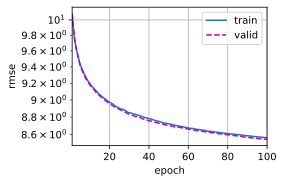

In [49]:
# k, num_epochs, lr, weight_decay, batch_size = 5, 100, 5, 0, 64
# 调整后参数
k, num_epochs, lr, weight_decay, batch_size = 3, 100, 0.1, 4, 30
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')

### 提交Kaggle预测
使用所有数据对其进行训练使用所有数据对其进行训练 （而不是仅使用交叉验证中使用的
的数据）。
将预测保存在CSV文件中可以简化将结果上传到Kaggle的过程。

In [50]:
def train_and_pred(train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
             ylabel='log rmse', xlim=[1, num_epochs], yscale='log')
    print(f'训练log rmse：{float(train_ls[-1]):f}')
    # 将网络应用于测试集。
    preds = net(test_features).detach().numpy()
    # 将其重新格式化以导出到Kaggle
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('kaggle_house_pred_submission.csv', index=False)

训练log rmse：8.507030


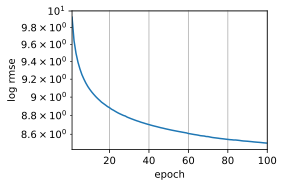

In [51]:
train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)